# DRYF GENETYCZNY
# Piotr Skiba

### Kod

In [19]:
import random as rd
import csv

class GeneticDrift():
    
    def __init__(self, popul_no=500, generation=1000):
        self.gene = [['A', 'a'], ['B', 'b'], ['C', 'c'], ['D', 'd']]
        self.popul_no = popul_no
        self.generation = generation
        self.populace = []
        self.new_populace = []
        self.result = []

    # Protoplasta populacji
    def population(self):
        for i in range(self.popul_no):
            elem = []
            for j in range(len(self.gene)):
                elem.append(rd.choices(self.gene[j], k=2))
            self.populace.append(elem)
        return self.populace
    
    # Licznik procentowy występowania danych alleli w stosunku do genu.
    def counter(self):
        counting = {
            'A': 0,
            'a': 0,
            'B': 0,
            'b': 0,
            'C': 0,
            'c': 0,
            'D': 0,
            'd': 0
        }
        
        for v, x, y, z in self.populace:
            counting[v[0]] += 1
            counting[v[1]] += 1
            counting[x[0]] += 1
            counting[x[1]] += 1
            counting[y[0]] += 1
            counting[y[1]] += 1
            counting[z[0]] += 1
            counting[z[1]] += 1

        keys = list(counting.keys())
        
        result = []
        for i in range(len(counting)):
            if i % 2 == 0:
                result.append(counting[keys[i]]/(counting[keys[i]]+counting[keys[i+1]]))
            else:
                result.append(counting[keys[i]]/(counting[keys[i]]+counting[keys[i-1]]))
        return result
    
    # Nowa populacja. Każda para tworzy dwa nowe osobniki
    def mate(self):
        l = len(self.populace)
        while self.populace != []:
            parents = []
            parents.append(self.populace.pop(rd.randint(0, l-1)))
            l -= 1
            parents.append(self.populace.pop(rd.randint(0, l-1)))
            l -= 1
            for i in range(2):
                allel_1 = [rd.choice(parents[0][0]), rd.choice(parents[1][0])]
                allel_2 = [rd.choice(parents[0][1]), rd.choice(parents[1][1])]
                allel_3 = [rd.choice(parents[0][2]), rd.choice(parents[1][2])]
                allel_4 = [rd.choice(parents[0][3]), rd.choice(parents[1][3])]
                self.new_populace.append([allel_1, allel_2, allel_3, allel_4])
        else:
            self.populace = self.new_populace
            self.new_populace = []

    # Funkcja przetwarzająca
    def processing(self):
        self.population()
        self.result.append(self.counter())
        for i in range(self.generation):
            self.mate()
            self.result.append(self.counter())
        return self.result

if __name__ == '__main__':
    # 1 - Liczba populacji (bazowa wartosc 500), 2 - Liczba pokoleń (bazowa wartość 1000)
    data = GeneticDrift(400, 1000) # <---------- Zmiana danych wejściowych ----------<<
    result = data.processing()
    with open('wyniki.csv', 'w', newline='') as csvfile:
        head = ['A','a','B','b','C','c','D','d']
        result.insert(0, head)
        csv_writer = csv.writer(csvfile)
        for line in result:
            csv_writer.writerow(line)

### Rysunek

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 5)

In [21]:
!head ./wyniki.csv

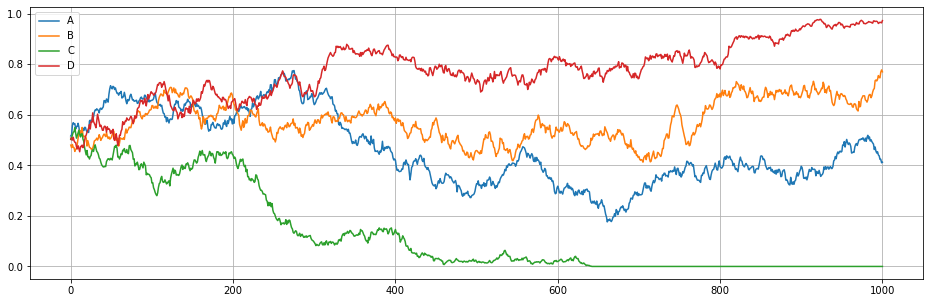

In [22]:
df = pd.read_csv('./wyniki.csv')
df.plot(y='A B C D'.split())
plt.grid()

### Wnioski

1. Wykonując kilka początkowych testów z wykorzystaniem różnych wartości można dojść do wniosku że im większa
   wartość pokolenia tym dokładniejsze są wyniki i można zaobserwować jak przebiega proces różnorodności 
   genetycznej, wartość populacji jednoznacznie pokazuje że im większa wartość tym mniejsza szansa na wyginięcie
   konkretnych alleli.

PODSUMOWUJĄC

2. Im mniejsza wartość populacji tym mniej pokoleń musi minąć aby doprowadzić do pełnej "naprawy" alleli 
    (Ale także upośledza to przyszłe pokolenia ze względu na brak różnorodności genetycznej).
    Duże znaczenie ma także zdarzenie losowe które może wynikać z samej reprodukcji jak i kataklizmy które
    powodują zmniejszenie populacji, a mniejsza populacja to większe prawdopodobieństwo/ryzyko na trwałe zmiany w kodzie genetycznym przyszłych pokoleń.